In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./TMDB_movie_dataset_v11.csv')
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


Analysis

In [3]:
data.shape
# data.columns

(1066450, 24)

In [4]:
data.isna().any()

id                      False
title                    True
vote_average            False
vote_count              False
status                  False
release_date             True
revenue                 False
runtime                 False
adult                   False
backdrop_path            True
budget                  False
homepage                 True
imdb_id                  True
original_language       False
original_title           True
overview                 True
popularity              False
poster_path              True
tagline                  True
genres                   True
production_companies     True
production_countries     True
spoken_languages         True
keywords                 True
dtype: bool

In [5]:
data[data['imdb_id'].isna()].head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
5349,567604,Once Upon a Deadpool,7.146,646,Released,2018-12-11,0,118,False,/3M9ZKIx4khmyll2DGB5zil626UA.jpg,...,Once Upon a Deadpool,A kidnapped Fred Savage is forced to endure De...,23.001,/5Ka49BWWyKMXr93YMbH5wLN7aAM.jpg,Yule believe in miracles.,"Comedy, Action, Adventure","20th Century Fox, Genre Films, Maximum Effort",United States of America,English,"superhero, based on comic, christmas"
5530,836466,Return,6.291,619,Released,2020-06-10,0,12,False,NaN,...,Return,A single man has worked most of his life in a ...,7.915,NaN,NaN,Animation,NaN,NaN,NaN,NaN
7412,1040330,Black Adam: Saviour or Destroyer?,6.998,404,Released,2022-10-15,0,22,False,/jVsbzy5gj3McD8V6dDr7EMrLSqT.jpg,...,Black Adam: Saviour or Destroyer?,Ahead of the release of upcoming fantasy film ...,10.918,/sTuXDWacwdcMS7NNLaynkfVBZkr.jpg,NaN,Documentary,NaN,NaN,English,behind the scenes


In [6]:
data['genres'].unique()
data['keywords'].unique()#no use
data['status'].unique()

array(['Released', 'Planned', 'In Production', 'Post Production',
       'Rumored', 'Canceled'], dtype=object)

Cleaning

In [7]:
#cleaning on the release date
releaseD=pd.to_datetime(data['release_date'],format='%Y-%m-%d',errors='coerce') #Setting errors to 'coerce' will convert any date string that doesn't match the format to NaT (Not a Time)

#dropping movies with not mentioned released_date
imag_film=data[releaseD.isna()]
no_imag_data=data.drop(imag_film.index)

In [8]:
no_imag_data['release_date']=pd.to_datetime(no_imag_data['release_date'],format='%Y-%m-%d')

In [9]:
import datetime
no_imag_data[no_imag_data['release_date']<np.datetime64('1881')].__len__()
historicM=no_imag_data[no_imag_data['release_date']<np.datetime64('1891')]
futM=no_imag_data[no_imag_data['release_date']>np.datetime64('2030')]
#dropping movies released before 1891
no_his_data=no_imag_data.drop(historicM.index) 
no_his_fut_data=no_his_data.drop(futM.index)
no_his_fut_data.shape

(918981, 24)

In [10]:
releasedM=no_his_fut_data[no_his_fut_data['status']=='Released']
rumouredM=no_his_fut_data[no_his_fut_data['status']=='Rumored']
plannedM=no_his_fut_data[no_his_fut_data['status']=='Planned']
inproductionM=no_his_fut_data[no_his_fut_data['status']=='In Production']
postproductionM=no_his_fut_data[no_his_fut_data['status']=='Post Production']
canceledM=no_his_fut_data[no_his_fut_data['status']=='Canceled']

In [11]:
numerical_col=data.select_dtypes(include=['int64' ,'float64']).columns.tolist()
numerical_col.remove('id')
numerical_col

['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']

In [12]:
# # List of numerical columns
# numerical_columns = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']

# # Create a grid of subplots
# fig, axs = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(15, 15))

# # Iterate over numerical columns to fill the grid
# for idx, col1 in enumerate(numerical_columns):
#     for idx2, col2 in enumerate(numerical_columns):
#         if idx == idx2:
#             # Diagonal: plot histogram of col1
#             axs[idx, idx2].hist(data[col1])
#             axs[idx, idx2].set_title(f'Histogram of {col1}')
#         elif idx > idx2:
#             # Below diagonal: plot scatter plot of col1 vs. col2
#             axs[idx, idx2].scatter(data[col1], data[col2], alpha=0.5)
#             axs[idx, idx2].set_xlabel(col1)
#             axs[idx, idx2].set_ylabel(col2)

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()


In [13]:
# _ = pd.plotting.scatter_matrix(releasedM[numerical_col], figsize = (10,10), alpha = 0.3)

In [14]:
corr = releasedM[numerical_col].corr()
corr.style.background_gradient(cmap='coolwarm')

,vote_average,vote_count,revenue,runtime,budget,popularity
vote_average,1.000000,0.095326,0.060346,0.204085,0.077042,0.112761
vote_count,0.095326,1.000000,0.743218,0.058979,0.633421,0.253252
revenue,0.060346,0.743218,1.000000,0.043228,0.734192,0.241566
runtime,0.204085,0.058979,0.043228,1.000000,0.059024,0.065865
budget,0.077042,0.633421,0.734192,0.059024,1.000000,0.265112
popularity,0.112761,0.253252,0.241566,0.065865,0.265112,1.000000


In [15]:
For_rating=releasedM[['revenue','genres','popularity','runtime','vote_average']].copy()
For_rating.head()

,revenue,genres,popularity,runtime,vote_average
0,825532764,"Action, Science Fiction, Adventure",83.952,148,8.364
1,701729206,"Adventure, Drama, Science Fiction",140.241,169,8.417
2,1004558444,"Drama, Action, Crime, Thriller",130.643,152,8.512
3,2923706026,"Action, Adventure, Fantasy, Science Fiction",79.932,162,7.573
4,1518815515,"Science Fiction, Action, Adventure",98.082,143,7.710


In [16]:
import sklearn.preprocessing
import sklearn.linear_model

regressor=sklearn.linear_model.LinearRegression()

In [17]:
genres=For_rating['genres']
genres.str.split(',')

0                    [Action,  Science Fiction,  Adventure]
1                     [Adventure,  Drama,  Science Fiction]
2                       [Drama,  Action,  Crime,  Thriller]
3          [Action,  Adventure,  Fantasy,  Science Fiction]
4                    [Science Fiction,  Action,  Adventure]
                                 ...                       
1066444                                 [Fantasy,  Romance]
1066445                                       [Documentary]
1066446                                            [Comedy]
1066447                                                 NaN
1066448                                            [Comedy]
Name: genres, Length: 912878, dtype: object

In [18]:
ag = genres.str.replace(' ', '').str.split(',')
all_genres = set()
for x in ag:
    if (type(x) == type([0])):
        all_genres = all_genres.union(set(x))
    
print(all_genres)

{'Fantasy', 'Family', 'Crime', 'Thriller', 'Romance', 'ScienceFiction', 'Music', 'Drama', 'Mystery', 'Documentary', 'Adventure', 'Action', 'Horror', 'War', 'Animation', 'Western', 'History', 'TVMovie', 'Comedy'}


In [19]:
for genre in all_genres:    
    For_rating.loc[:,genre] = ag.apply(lambda x : genre in x if type(x) == type([]) else False)
dataset_ = For_rating.drop('genres', axis = 1)
dataset_.head()

,revenue,popularity,runtime,vote_average,Fantasy,Family,Crime,Thriller,Romance,ScienceFiction,...,Documentary,Adventure,Action,Horror,War,Animation,Western,History,TVMovie,Comedy
0,825532764,83.952,148,8.364,False,False,False,False,False,True,...,False,True,True,False,False,False,False,False,False,False
1,701729206,140.241,169,8.417,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,1004558444,130.643,152,8.512,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2923706026,79.932,162,7.573,True,False,False,False,False,True,...,False,True,True,False,False,False,False,False,False,False
4,1518815515,98.082,143,7.710,False,False,False,False,False,True,...,False,True,True,False,False,False,False,False,False,False


In [20]:
import sklearn.model_selection
import sklearn.preprocessing

X_all = dataset_.drop('revenue', axis = 1)
y_all = dataset_['revenue']

scaler_all = sklearn.preprocessing.StandardScaler().fit(X_all)

X_all_scaled = scaler_all.transform(X_all)
positive_dataset = dataset_.reindex(dataset_[dataset_.revenue > 0].index)

X_positive = positive_dataset.drop('revenue', axis = 1)
y_positive = positive_dataset['revenue']
scaler_positive = sklearn.preprocessing.StandardScaler().fit(X_positive)
X_positive_scaled = scaler_positive.transform(X_positive)


positive_dataset = dataset_.reindex(dataset_[dataset_.revenue > 0].index)
X_positive = positive_dataset.drop('revenue', axis = 1)
y_positive = positive_dataset['revenue']
scaler_positive = sklearn.preprocessing.StandardScaler().fit(X_positive)
X_positive_scaled = scaler_positive.transform(X_positive)

X_train_all,X_test_all,y_train_all,y_test_all=sklearn.model_selection.train_test_split(X_all_scaled, y_all,
    test_size=0.3,
    train_size=None, #This is implicit; the rest of the data will be used for training
    random_state=42,
    shuffle=True,
    stratify=None)
X_train_positive, X_test_positive, y_train_positive, y_test_positive = sklearn.model_selection.train_test_split(
    X_positive_scaled, y_positive,
    test_size = 0.3,
    train_size = None,
    random_state = 42,
    shuffle = True,
    stratify = None
)

In [21]:
import sklearn.linear_model

all_regressor=sklearn.linear_model.LinearRegression()
positive_regressor=sklearn.linear_model.LinearRegression()
all_regressor.fit(X_train_all,y_train_all)
positive_regressor.fit(X_train_positive,y_train_positive)

print(f'R2 Regressor accoumting for all released movies : {all_regressor.score(X_test_all,y_test_all):.2f}')
print(f'R2 Regressor accoumting for positive released movies : {positive_regressor.score(X_test_positive,y_test_positive):.2f}')


R2 Regressor accoumting for all released movies : 0.08
R2 Regressor accoumting for positive released movies : 0.18


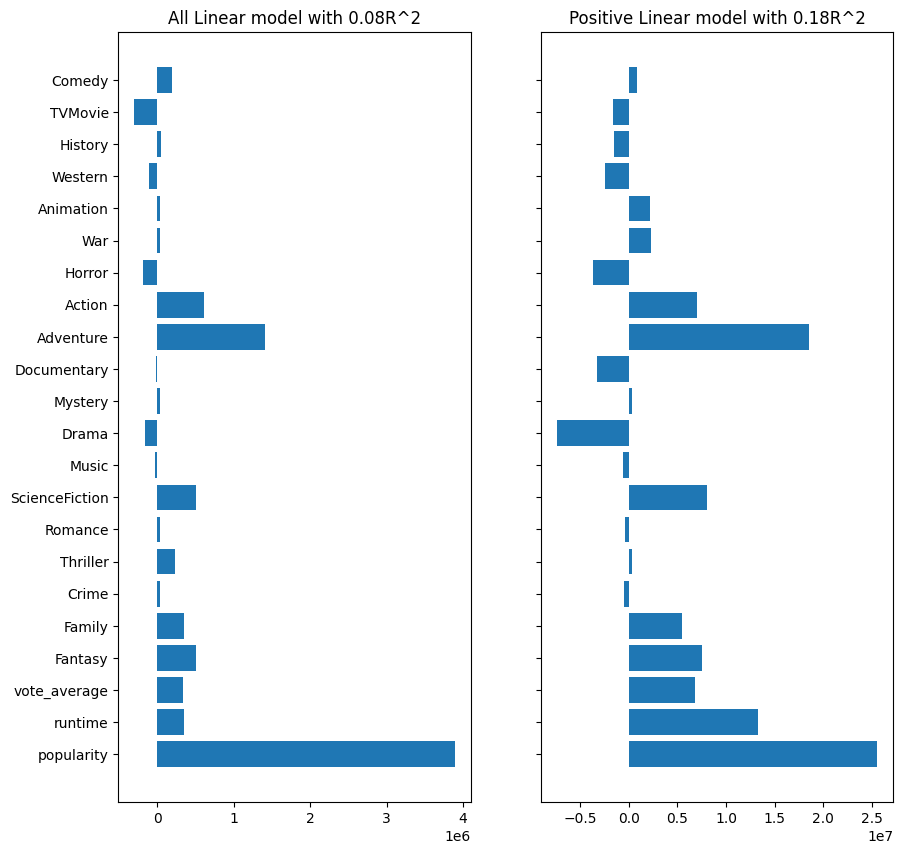

In [22]:
#plotting regression model
fig,axs=plt.subplots(1,2,figsize=(10,10),sharey=True)
axs[0].barh(np.arange(len(all_regressor.coef_)),all_regressor.coef_)
axs[1].barh(np.arange(len(positive_regressor.coef_)),positive_regressor.coef_)
_=axs[0].set_yticks(np.arange(len(all_regressor.coef_)),labels=X_all.columns)
_=axs[0].set(title=f'All Linear model with {all_regressor.score(X_test_all,y_test_all):.2f}R^2')
_=axs[1].set(title=f'Positive Linear model with {positive_regressor.score(X_test_positive,y_test_positive):.2f}R^2')

R2 Regressor accoumting for all released movies : 0.08
R2 Regressor accoumting for positive released movies : 0.18


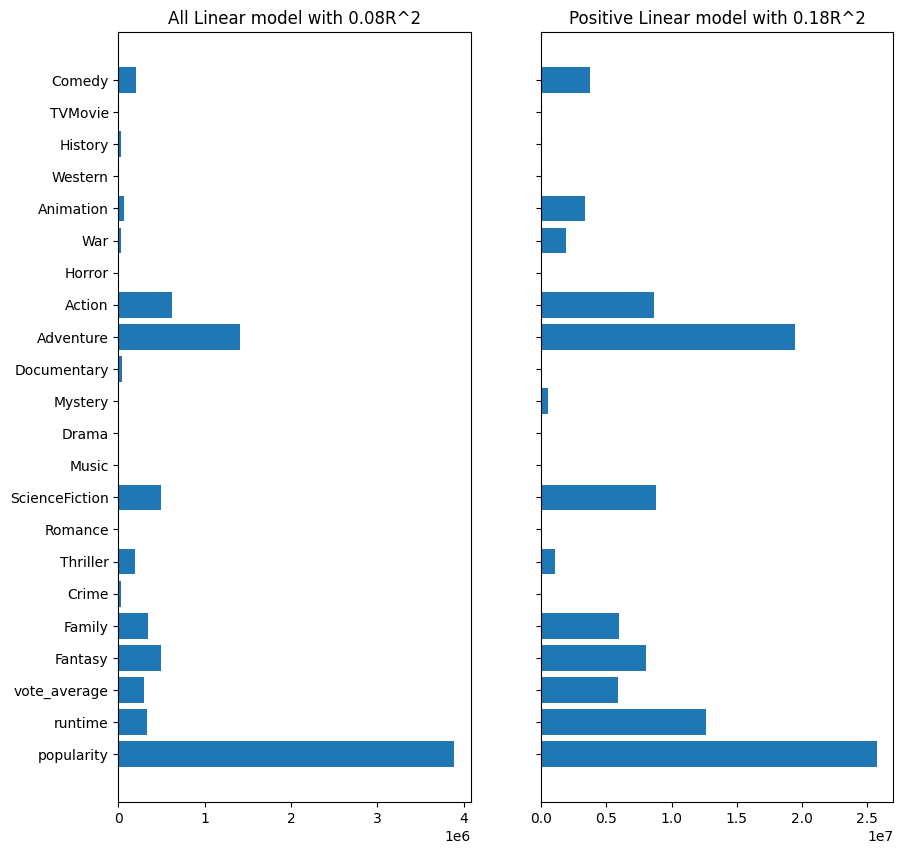

In [23]:
all_regressor=sklearn.linear_model.LinearRegression(positive=True)
positive_regressor=sklearn.linear_model.LinearRegression(positive=True)
all_regressor.fit(X_train_all,y_train_all)
positive_regressor.fit(X_train_positive,y_train_positive)
print(f'R2 Regressor accoumting for all released movies : {all_regressor.score(X_test_all,y_test_all):.2f}')
print(f'R2 Regressor accoumting for positive released movies : {positive_regressor.score(X_test_positive,y_test_positive):.2f}')

#plotting regression model
fig,axs=plt.subplots(1,2,figsize=(10,10),sharey=True)
axs[0].barh(np.arange(len(all_regressor.coef_)),all_regressor.coef_)
axs[1].barh(np.arange(len(positive_regressor.coef_)),positive_regressor.coef_)
_=axs[0].set_yticks(np.arange(len(all_regressor.coef_)),labels=X_all.columns)
_=axs[0].set(title=f'All Linear model with {all_regressor.score(X_test_all,y_test_all):.2f}R^2')
_=axs[1].set(title=f'Positive Linear model with {positive_regressor.score(X_test_positive,y_test_positive):.2f}R^2')

Ridge regression

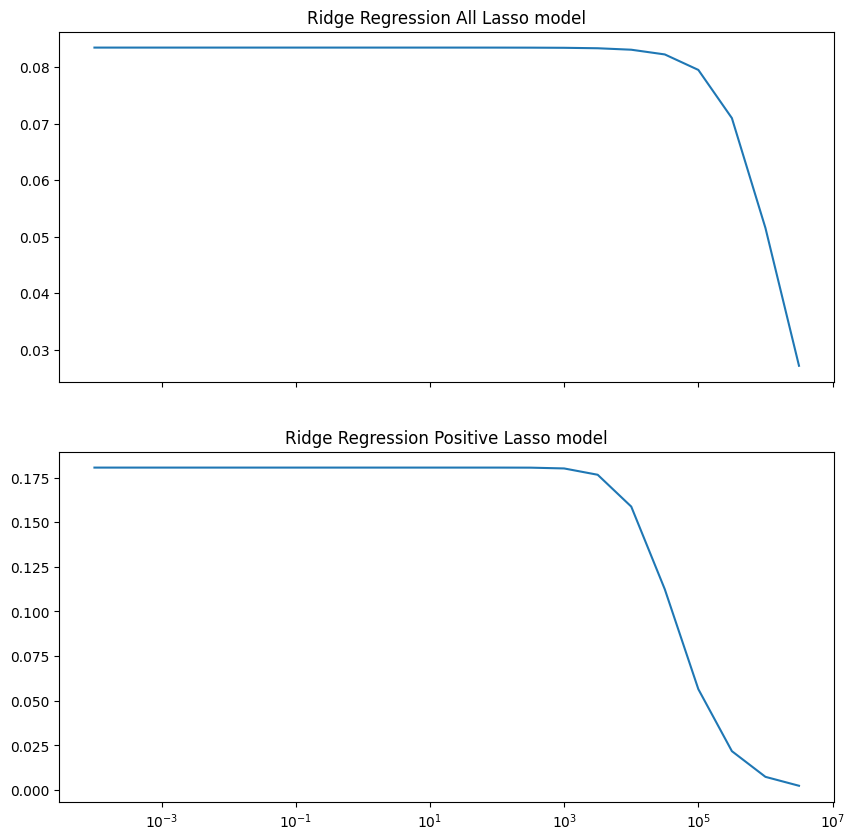

In [25]:
alpha_coefs = 10**np.arange(-4,7,0.5)
all_regressor_list = [sklearn.linear_model.Ridge(alpha=alpha, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None) for alpha in alpha_coefs]
positive_regressor_list = [sklearn.linear_model.Ridge(alpha=alpha, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None) for alpha in alpha_coefs]

_ = [all_regressor.fit(X_train_all, y_train_all) for all_regressor in all_regressor_list]
_ = [positive_regressor.fit(X_train_positive, y_train_positive) for positive_regressor in positive_regressor_list]

# _ = [print(f'Alpha : {alpha:e} Regressor accounting for all released movies     : {all_regressor.score(X_test_all, y_test_all) * 100:.2f}%') for alpha, all_regressor in zip(alpha_coefs, all_regressor_list)]
# _ = [print(f'Alpha : {alpha:e} Regressor accounting for postive released movies : {positive_regressor.score(X_test_positive, y_test_positive) * 100:.2f}%') for alpha, positive_regressor in zip(alpha_coefs,positive_regressor_list)]

all_reg_best_score = 0.0
all_reg_best_alpha = 0.0
positive_reg_best_score= 0.0
positive_reg_best_alpha= 0.0

# for alpha,regressor in zip(alpha_coefs, all_regressor_list):
#     if (regressor.score(X_test_all, y_test_all) > all_reg_best_score):
#         all_reg_best_alpha = alpha
#         all_reg_best_score = regressor.score(X_test_all, y_test_all)

# for alpha,regressor in zip(alpha_coefs, positive_regressor_list):
#     if (regressor.score(X_test_all, y_test_all) > positive_reg_best_score):
#         positive_reg_best_alpha = alpha
#         positive_reg_best_score = regressor.score(X_test_all, y_test_all)


fig, axs = plt.subplots(2,1, figsize = (10,10), sharex = True)
axs[0].semilogx(alpha_coefs, [reg.score(X_test_all, y_test_all) for reg in all_regressor_list])
_ = axs[0].set(title = f'Ridge Regression All Lasso model')

axs[1].semilogx(alpha_coefs, [reg.score(X_test_positive, y_test_positive) for reg in positive_regressor_list])
_ = axs[1].set(title = f'Ridge Regression Positive Lasso model')

In [33]:

import itertools

alpha_coefs = 10**np.arange(-1,3,0.5)
l1_ratios = np.arange(0,1,0.1)

all_regressor_list = [
    sklearn.linear_model.ElasticNet(
        alpha=alpha, 
        l1_ratio=l1_ratio, 
        fit_intercept=True, 
        precompute=False, 
        max_iter=1000, 
        copy_X=True, 
        tol=0.0001, 
        warm_start=False, 
        positive=False, 
        random_state=None, 
        selection='cyclic'
    ) for alpha, l1_ratio in itertools.product(alpha_coefs, l1_ratios)
]
positive_regressor_list = [
    sklearn.linear_model.ElasticNet(
        alpha=alpha, 
        l1_ratio=l1_ratio, 
        fit_intercept=True, 
        precompute=False, 
        max_iter=1000, 
        copy_X=True, 
        tol=0.0001, 
        warm_start=False, 
        positive=False, 
        random_state=None, 
        selection='cyclic'
    ) for alpha, l1_ratio in itertools.product(alpha_coefs, l1_ratios)
]



# _ = [print(f'Alpha : {alpha:e}, l1_ratio : {l1_ratio:e} Regressor accounting for all released movies     : {all_regressor.score(X_test_all, y_test_all) * 100:.2f}%') for (alpha, l1_ratio), all_regressor in zip(itertools.product(alpha_coefs, l1_ratios), all_regressor_list)]
# _ = [print(f'Alpha : {alpha:e}, l1_ratio : {l1_ratio:e} Regressor accounting for postive released movies : {positive_regressor.score(X_test_positive, y_test_positive) * 100:.2f}%') for (alpha, l1_ratio), positive_regressor in zip(itertools.product(alpha_coefs, l1_ratios),positive_regressor_list)]

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    _ = [all_regressor.fit(X_train_all, y_train_all) for all_regressor in all_regressor_list]
    _ = [positive_regressor.fit(X_train_positive, y_train_positive) for positive_regressor in positive_regressor_list]

In [28]:
all_elasticnet_regressors = pd.DataFrame(np.reshape(np.array([ar.score(X_test_all, y_test_all) for ar in all_regressor_list]), (alpha_coefs.__len__(), l1_ratios.__len__())), columns = l1_ratios, index = alpha_coefs)
all_elasticnet_regressors.style.background_gradient(cmap='coolwarm')

NameError: name 'l1_ratios' is not defined